In [1]:
import pyLDAvis

In [2]:
import pyLDAvis.sklearn

In [3]:
from pymongo import MongoClient

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
client = MongoClient('localhost', 27017)
db = client['album_info']
lyric_coll = db['lyrics']
album_coll = db['albums']

In [8]:
albums, lyrics = [], []

album_cursor = album_coll.find({})
for document in album_cursor:
    albums.append(document)

lyric_cursor = lyric_coll.find({})
for document in lyric_cursor:
    lyrics.append(document)

In [9]:
albums_df = pd.DataFrame(albums)
lyrics_df = pd.DataFrame(lyrics)
new_album_df = pd.DataFrame()

In [10]:
albums_cp = albums_df.copy()
# clean cols
artist = [] 

for a in albums_cp.artist:
    artist.append(a[0])
    
artist_id = [] 

for a in albums_cp.artist_id:
    artist_id.append(a[0])
    
album = [] 

for a in albums_cp.album:
    album.append(a[0])
    
album_type = []

for a in albums_cp.album_type:
    album_type.append(a[0])
    
album_id = []

for a in albums_cp.album_id:
    album_id.append(a[0])
    
album_label = [] 

for a in albums_cp.album_label:
    album_label.append(a[0])
    
album_popularity = [] 

for a in albums_cp.album_popularity:
    album_popularity.append(a[0])
    
release_date = []

for a in albums_cp.release_date:
    release_date.append(a[0])
    
release_prec = []

for a in albums_cp.release_prec:
    release_prec.append(a[0])
    
album_release = []

for a in albums_cp.album_release:
    album_release.append(a[0])
    
upc_code = []

for a in albums_cp.upc_code:
    if type(a) == list:
        upc_code.append(a[0])
    else:
        upc_code.append(a)

new_album_df = pd.DataFrame()

new_album_df['artist'] = artist
new_album_df['artist_id'] = artist_id
new_album_df['album'] = album
new_album_df['album_type'] = album_type
new_album_df['album_id'] = album_id
new_album_df['album_label'] = album_label
new_album_df['album_popularity'] = album_popularity
new_album_df['release_date'] = release_date
new_album_df['release_prec'] = release_prec
new_album_df['album_release'] = album_release
new_album_df['upc_code'] = upc_code

In [11]:
albums_df = new_album_df

In [12]:
albums_df.head()

,artist,artist_id,album,album_type,album_id,album_label,album_popularity,release_date,release_prec,album_release,upc_code
0,Eleanor Arroway,3x2VCXXsd5bySXXdbhLZPJ,Reaching Out,single,3RoG4xBbhThunES2bojEm7,Firefly Entertainment,53,2019-08-19,day,Reaching Out by Eleanor Arroway,NaN
1,The Dangerous Summer,0iMnpaEHXkgMT956CmP1kj,Reach For The Sun,album,1awdBA8DLv6G5eBvdGxk8T,Hopeless Records,53,2009-05-05,day,Reach For The Sun by The Dangerous Summer,790692070862
2,Blackmill,4kjWnaLfIRcLJ1Dy4Wr6tY,Reach For Glory,album,0XHpO9qTpqJJQwa2zFxAAE,Blackmill,52,2011-02-28,day,Reach For Glory by Blackmill,859705377371
3,potsu,5XE0fiZWGbq9TcSuWwJ1fA,Reaching For a Star,album,5bcobCRR5ovNoZWAp3iJgG,potsu,53,2020-07-12,day,Reaching For a Star by potsu,193436222020
4,Chama Wijnen,7ftRhte6NNzoF9MIKfKJsP,Reaching,single,1coFYbyXU2dxO3lrUsbdIy,Chama Wijnen,56,2019-05-25,day,Reaching by Chama Wijnen,7350109080827


In [13]:
albums_df = albums_df[['album_id', 'album_release']]

In [14]:
albums_df

,album_id,album_release
0,3RoG4xBbhThunES2bojEm7,Reaching Out by Eleanor Arroway
1,1awdBA8DLv6G5eBvdGxk8T,Reach For The Sun by The Dangerous Summer
2,0XHpO9qTpqJJQwa2zFxAAE,Reach For Glory by Blackmill
3,5bcobCRR5ovNoZWAp3iJgG,Reaching For a Star by potsu
4,1coFYbyXU2dxO3lrUsbdIy,Reaching by Chama Wijnen
...,...,...
833,2fYhqwDWXjbpjaIJPEfKFw,"thank u, next by Ariana Grande"
834,0g1F5eGVwX4Sxi1n8ojPkE,Dan + Shay by Dan + Shay
835,4gvQO5mEuhbMSrLIuwXkmz,LAS QUE NO IBAN A SALIR by Bad Bunny
836,6x4UQQ7TVOja89iXV047Zo,All For Us (from the HBO Original Series Eupho...


In [15]:
lyrics_df.pop('_id');

In [16]:
lyrics_df

,album_id,lyrics
0,3RoG4xBbhThunES2bojEm7,
1,1awdBA8DLv6G5eBvdGxk8T,"In the back of my mind, well I fought, my Go..."
2,0XHpO9qTpqJJQwa2zFxAAE,Original video InstrumentalInstrumentalInstru...
3,5bcobCRR5ovNoZWAp3iJgG,They said that they want me No matt...
4,1coFYbyXU2dxO3lrUsbdIy,
...,...,...
833,2fYhqwDWXjbpjaIJPEfKFw,"Step up, the two of us, nobody knows us Get ..."
834,0g1F5eGVwX4Sxi1n8ojPkE,I couldn't help but notice you were sitting ...
835,4gvQO5mEuhbMSrLIuwXkmz,"Yeh yeh, yeh yeh, yeh yeh La calle est ap..."
836,6x4UQQ7TVOja89iXV047Zo,Bazzi No Way! Megan Thee Stallion Hot Girl...


In [17]:
album_lyrics = albums_df.merge(lyrics_df)

In [18]:
album_lyrics

,album_id,album_release,lyrics
0,3RoG4xBbhThunES2bojEm7,Reaching Out by Eleanor Arroway,
1,1awdBA8DLv6G5eBvdGxk8T,Reach For The Sun by The Dangerous Summer,"In the back of my mind, well I fought, my Go..."
2,0XHpO9qTpqJJQwa2zFxAAE,Reach For Glory by Blackmill,Original video InstrumentalInstrumentalInstru...
3,5bcobCRR5ovNoZWAp3iJgG,Reaching For a Star by potsu,They said that they want me No matt...
4,1coFYbyXU2dxO3lrUsbdIy,Reaching by Chama Wijnen,
...,...,...,...
833,2fYhqwDWXjbpjaIJPEfKFw,"thank u, next by Ariana Grande","Step up, the two of us, nobody knows us Get ..."
834,0g1F5eGVwX4Sxi1n8ojPkE,Dan + Shay by Dan + Shay,I couldn't help but notice you were sitting ...
835,4gvQO5mEuhbMSrLIuwXkmz,LAS QUE NO IBAN A SALIR by Bad Bunny,"Yeh yeh, yeh yeh, yeh yeh La calle est ap..."
836,6x4UQQ7TVOja89iXV047Zo,All For Us (from the HBO Original Series Eupho...,Bazzi No Way! Megan Thee Stallion Hot Girl...


In [19]:
album_lyrics.lyrics = album_lyrics.lyrics.replace(r'^\s*$', np.NaN, regex=True)

In [20]:
lyrics_flag = pd.isna(album_lyrics['lyrics'])

In [21]:
album_lyrics = album_lyrics[~lyrics_flag]

In [22]:
album_lyrics.reset_index(inplace=True)
album_lyrics.pop('index');
album_lyrics

,album_id,album_release,lyrics
0,1awdBA8DLv6G5eBvdGxk8T,Reach For The Sun by The Dangerous Summer,"In the back of my mind, well I fought, my Go..."
1,0XHpO9qTpqJJQwa2zFxAAE,Reach For Glory by Blackmill,Original video InstrumentalInstrumentalInstru...
2,5bcobCRR5ovNoZWAp3iJgG,Reaching For a Star by potsu,They said that they want me No matt...
3,6Zho4ar8UMxJLMDpWcLGto,Refuge by Canyon City,When you try your best but you don't succeed...
4,07OjWJVHVzsbZ5ytXhj7ou,Real Hate by Philthy Rich,Lyrics for this song ha...
...,...,...,...
737,2fYhqwDWXjbpjaIJPEfKFw,"thank u, next by Ariana Grande","Step up, the two of us, nobody knows us Get ..."
738,0g1F5eGVwX4Sxi1n8ojPkE,Dan + Shay by Dan + Shay,I couldn't help but notice you were sitting ...
739,4gvQO5mEuhbMSrLIuwXkmz,LAS QUE NO IBAN A SALIR by Bad Bunny,"Yeh yeh, yeh yeh, yeh yeh La calle est ap..."
740,6x4UQQ7TVOja89iXV047Zo,All For Us (from the HBO Original Series Eupho...,Bazzi No Way! Megan Thee Stallion Hot Girl...


In [109]:
from nltk.corpus import stopwords

In [60]:
stop = list(stopwords.words('english'))

In [93]:
stop.extend('30 28 27 24 21 2018 2017 2016 2015 2013 2012 20 19 18 17 16 15 14 13 12 11 1009 10 02 01 00'.split())



In [23]:
lyrics = album_lyrics.lyrics

In [ ]:
# vc = CountVectorizer(max_features=1000, stop_words=stop)
vc = CountVectorizer(stop_words=stop)

In [95]:
M = vc.fit_transform(lyrics)

In [96]:
words = vc.get_feature_names()

In [97]:
word_cnt = pd.DataFrame(M.todense(), columns=words)

In [98]:
word_cnt

,able,abonado,according,account,across,act,action,actually,acuerdo,added,...,yeah,year,years,yes,yet,yo,york,young,youre,zoe
0,0,0,0,0,0,0,0,0,0,0,...,7,5,2,0,6,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,14,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,5,0
4,0,0,0,0,0,0,0,0,0,0,...,2,1,2,0,15,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,2,0,0,0,0,1,0,0,0,0,...,193,0,0,0,0,0,0,0,1,0
738,0,0,0,0,0,0,0,0,0,0,...,20,0,0,0,0,0,1,0,0,0
739,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,0,73,0,0,0,0
740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
album_word_cnt = pd.concat([album_lyrics, word_cnt], axis=1)
album_lyrics

,album_id,album_release,lyrics
0,1awdBA8DLv6G5eBvdGxk8T,Reach For The Sun by The Dangerous Summer,"In the back of my mind, well I fought, my Go..."
1,0XHpO9qTpqJJQwa2zFxAAE,Reach For Glory by Blackmill,Original video InstrumentalInstrumentalInstru...
2,5bcobCRR5ovNoZWAp3iJgG,Reaching For a Star by potsu,They said that they want me No matt...
3,6Zho4ar8UMxJLMDpWcLGto,Refuge by Canyon City,When you try your best but you don't succeed...
4,07OjWJVHVzsbZ5ytXhj7ou,Real Hate by Philthy Rich,Lyrics for this song ha...
...,...,...,...
737,2fYhqwDWXjbpjaIJPEfKFw,"thank u, next by Ariana Grande","Step up, the two of us, nobody knows us Get ..."
738,0g1F5eGVwX4Sxi1n8ojPkE,Dan + Shay by Dan + Shay,I couldn't help but notice you were sitting ...
739,4gvQO5mEuhbMSrLIuwXkmz,LAS QUE NO IBAN A SALIR by Bad Bunny,"Yeh yeh, yeh yeh, yeh yeh La calle est ap..."
740,6x4UQQ7TVOja89iXV047Zo,All For Us (from the HBO Original Series Eupho...,Bazzi No Way! Megan Thee Stallion Hot Girl...


In [100]:
album_word_cnt = album_word_cnt[~lyrics_flag]
album_word_cnt

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,album_id,album_release,lyrics,able,abonado,according,account,across,act,action,...,yeah,year,years,yes,yet,yo,york,young,youre,zoe
1,0XHpO9qTpqJJQwa2zFxAAE,Reach For Glory by Blackmill,Original video InstrumentalInstrumentalInstru...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5bcobCRR5ovNoZWAp3iJgG,Reaching For a Star by potsu,They said that they want me No matt...,0,0,0,0,0,1,1,...,14,0,0,0,0,0,0,1,0,0
3,6Zho4ar8UMxJLMDpWcLGto,Refuge by Canyon City,When you try your best but you don't succeed...,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,5,0
5,6xBdoRdtUb2Wl23WkyJGQj,Reach for Her Echo by Luke Davies,"Hints From Horace ATHENS: CAPUCHIN CONVENT, M...",0,0,1,2,0,4,4,...,0,3,7,1,18,0,0,7,0,0
6,7nWW2h7SFTPQJgJX0h1IMA,Reaching by The Midnight Quartet,Part III LIGHTS flicked on and house doors op...,1,0,0,0,17,1,0,...,0,6,18,10,6,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,6MbQdX6OomgQhZU6QCqMKW,Top by YoungBoy Never Broke Again,Wanna take it all back to where it started L...,0,0,0,0,0,4,0,...,82,1,1,0,1,0,1,11,0,0
738,0g1F5eGVwX4Sxi1n8ojPkE,Dan + Shay by Dan + Shay,I couldn't help but notice you were sitting ...,0,0,0,0,0,0,0,...,20,0,0,0,0,0,1,0,0,0
739,4gvQO5mEuhbMSrLIuwXkmz,LAS QUE NO IBAN A SALIR by Bad Bunny,"Yeh yeh, yeh yeh, yeh yeh La calle est ap...",0,0,0,0,0,0,0,...,6,0,0,0,0,73,0,0,0,0
740,6x4UQQ7TVOja89iXV047Zo,All For Us (from the HBO Original Series Eupho...,Bazzi No Way! Megan Thee Stallion Hot Girl...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
lyric_vocab = vc.vocabulary_
lyric_vocab

{'back': 57,
 'mind': 546,
 'well': 956,
 'god': 340,
 'cause': 128,
 'hell': 382,
 'time': 886,
 'still': 827,
 'see': 744,
 'went': 957,
 'year': 991,
 'made': 518,
 'things': 873,
 'know': 447,
 'sight': 770,
 'think': 874,
 'let': 481,
 'try': 911,
 'save': 731,
 'already': 22,
 'crazy': 173,
 'something': 796,
 'face': 266,
 'pulls': 676,
 'far': 272,
 'enough': 239,
 'away': 55,
 'always': 25,
 'knew': 446,
 'find': 290,
 'thought': 879,
 'live': 496,
 'wish': 969,
 'silence': 772,
 'makes': 520,
 'takes': 854,
 'lot': 511,
 'say': 733,
 'kind': 442,
 'front': 317,
 'head': 373,
 'reached': 691,
 'point': 650,
 'part': 620,
 'town': 902,
 'song': 799,
 'want': 946,
 'take': 852,
 'steps': 826,
 'never': 580,
 'need': 578,
 'stand': 814,
 'straight': 832,
 'feel': 279,
 'breath': 99,
 'really': 696,
 'change': 135,
 'bad': 58,
 'learning': 472,
 'wrong': 987,
 'everything': 257,
 'reason': 697,
 'way': 953,
 'like': 488,
 'finally': 289,
 'looking': 505,
 'gave': 326,
 'called': 1

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# sns.distplot(vc.vocabulary_)

In [112]:
from collections import Counter

In [113]:
c = Counter(lyric_vocab)

In [121]:
top10 = c.most_common(10)

In [110]:
most_frequent_word = max(lyric_vocab, key=lyric_vocab.get)
most_frequent_word

'zoe'

In [106]:
album_word_cnt['zoe'].sum(), album_word_cnt['youre'].sum()

(1497, 2806)

In [115]:
album_word_cnt[album_word_cnt['zoe'] > 0]

,album_id,album_release,lyrics,able,abonado,according,account,across,act,action,...,yeah,year,years,yes,yet,yo,york,young,youre,zoe
13,06jz1EAw6DYQ2kRYy4A3Ph,Refuge by Samuel Kim,A long shot view of the cul de sac is seen. It...,4,0,49,7,7,8,15,...,13,86,55,11,14,12,26,21,1,1
149,4r4L2MZb1SaAkb52YNxDPn,When You Are One! by Rainbow Songs,"(I'm down to bear the muscle ) One, two, th...",71,0,193,85,69,100,30,...,59,123,173,210,217,1,6,197,54,424
183,44UH34qoCNNfEqo0VnOkGd,Who Let The Dogs Out by Baha Men,"Who let the dogs out? (woof, woof, woof, woo...",0,0,1,2,10,7,1,...,8,8,13,37,5,17,1,13,0,106
251,6rXzKlK9EdmOrhEgnadFEh,Ring by Elijah Ing,"The Mabbot street entrance of nighttown, befor...",0,0,1,2,10,7,1,...,0,7,13,37,5,0,1,13,0,106
257,4iSBKX1KbpcEaNd2Jffrr2,Ferrari Boyz (Deluxe) by Gucci Mane & Waka Flo...,Holiday Season! PYONG! Catch up! It's Gucci!...,0,0,0,1,0,0,3,...,5,0,3,2,2,2,0,11,2,1
260,6nTPOfaH1rOAkcCfVz0HDC,Ferrari by Beats Academy,CHAPTER TWO A VISIT FROM ALBERTINE PROSPECT...,220,0,75,80,142,56,31,...,116,250,313,294,211,13,49,372,89,1
265,3NyOgmRtkGJWCa3MfTGH5L,Ferrari Boyz (Deluxe) by Gucci Mane,Holiday Season! PYONG! Catch up! It's Gucci!...,0,0,0,1,0,0,0,...,10,0,3,1,1,2,0,8,1,1
311,3CUlwWaMqhD0Mu4ZhNkhJl,Offering by j^p^n,"Styles: Yeah Sheek: Uh Huh, D Block Styles: D ...",3,0,6,8,7,7,6,...,49,2,3,14,9,10,4,21,1,1
375,7kPIXIWBzT4Ydt52VGk5id,"Playero 41: Past Present & Future, Pt 1 by Var...",4/1 Jessie Reyez BEFORE LOVE CAME TO KILL US...,23,0,5,10,23,90,49,...,7,126,146,40,19,125,11,32,0,109
520,6F9ypPJSeA9zUAvQL3i8AW,Brainstorm EP by Sully,Braid the raven hair Weave the supple tress ...,0,0,1,2,10,7,1,...,4,7,13,37,5,1,1,14,0,106


In [103]:
sorted(lyric_vocab, key=lyric_vocab.get, reverse=True)

['zoe',
 'youre',
 'young',
 'york',
 'yo',
 'yet',
 'yes',
 'years',
 'year',
 'yeah',
 'ye',
 'ya',
 'wrong',
 'written',
 'write',
 'would',
 'worth',
 'worse',
 'world',
 'works',
 'working',
 'work',
 'words',
 'word',
 'wonder',
 'women',
 'woman',
 'without',
 'within',
 'wit',
 'wish',
 'window',
 'wind',
 'wild',
 'wife',
 'wide',
 'whose',
 'whole',
 'white',
 'whether',
 'whatever',
 'west',
 'went',
 'well',
 'week',
 'ways',
 'way',
 'water',
 'watch',
 'warm',
 'war',
 'wants',
 'wanted',
 'want',
 'wanna',
 'wall',
 'walks',
 'walking',
 'walk',
 'waiting',
 'wait',
 'voice',
 'virtue',
 'vincent',
 'villeparisis',
 'view',
 'verdurin',
 'veidt',
 'various',
 'value',
 'used',
 'use',
 'us',
 'upon',
 'united',
 'understand',
 'uncle',
 'una',
 'un',
 'uh',
 'two',
 'twenty',
 'turns',
 'turning',
 'turned',
 'turn',
 'tu',
 'trying',
 'try',
 'truth',
 'trust',
 'true',
 'trouble',
 'tried',
 'trial',
 'trees',
 'train',
 'town',
 'towards',
 'toward',
 'touch',
 'top',

In [52]:
album_word_cnt['zurzeit'][album_word_cnt.zurzeit > 0]

644    1
Name: zurzeit, dtype: int64

In [53]:
album_word_cnt.iloc[644]

album_id                                    1uyf3l2d4XYwiEqAb7t7fX
album_release                   Doo-Wops & Hooligans by Bruno Mars
lyrics             Easy come, easy go, that's just how you live...
00                                                               0
000                                                              0
                                       ...                        
zza                                                              0
zzette                                                           0
zzz                                                              0
zzzzs                                                            0
zzzzzz                                                           0
Name: 734, Length: 219755, dtype: object

In [54]:
album_word_cnt.iloc[644].lyrics[0]

'  Easy come, easy go, that\'s just how you live, oh Take, take, take it all, but you never give Shoulda known you was trouble from the first kiss Had your eyes wide open; why were they open? (Ooh)    Gave you all I had and you tossed it in the trash You tossed it in the trash, you did To give me all your love is all I ever ask \'Cause what you don\'t understand is    I\'d catch a grenade for ya (Yeah, yeah, yeah) Throw my hand on a blade for ya (Yeah, yeah, yeah) I\'d jump in front of a train for ya (Yeah, yeah, yeah) You know I\'d do anything for ya (Yeah, yeah, yeah) Oh, oh oh oh oh, I would go through all this pain Take a bullet straight through my brain Yes, I would die for ya baby But you won\'t do the same    No, no, no, no, oh oh oh...    Black, black, black and blue, beat me \'til I\'m numb Tell the devil I said "Hey" when you get back to where you\'re from Mad woman, bad woman, that\'s just what you are Yeah, you\'ll smile in my face then rip the brakes out my car    Gave you

In [116]:
spotify_green = '#1DB954'

In [122]:
top10

[('zoe', 999),
 ('youre', 998),
 ('young', 997),
 ('york', 996),
 ('yo', 995),
 ('yet', 994),
 ('yes', 993),
 ('years', 992),
 ('year', 991),
 ('yeah', 990)]

<BarContainer object of 1000 artists>

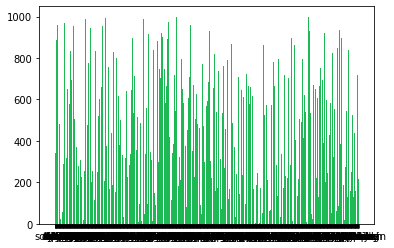

In [120]:
plt.bar(lyric_vocab.keys(), lyric_vocab.values(), color=spotify_green)

In [139]:
album_lyrics['word_cnt'] = album_lyrics.lyrics.apply(lambda x: len(x.split()))

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
lyrics_df = lyrics_df[~lyrics_flag]

In [129]:
lyrics_df

,album_id,lyrics,word_cnt
1,1awdBA8DLv6G5eBvdGxk8T,"In the back of my mind, well I fought, my Go...",4164
2,0XHpO9qTpqJJQwa2zFxAAE,Original video InstrumentalInstrumentalInstru...,6
3,5bcobCRR5ovNoZWAp3iJgG,They said that they want me No matt...,1990
5,6Zho4ar8UMxJLMDpWcLGto,When you try your best but you don't succeed...,710
6,07OjWJVHVzsbZ5ytXhj7ou,Lyrics for this song ha...,1849
...,...,...,...
833,2fYhqwDWXjbpjaIJPEfKFw,"Step up, the two of us, nobody knows us Get ...",4795
834,0g1F5eGVwX4Sxi1n8ojPkE,I couldn't help but notice you were sitting ...,3525
835,4gvQO5mEuhbMSrLIuwXkmz,"Yeh yeh, yeh yeh, yeh yeh La calle est ap...",4073
836,6x4UQQ7TVOja89iXV047Zo,Bazzi No Way! Megan Thee Stallion Hot Girl...,478


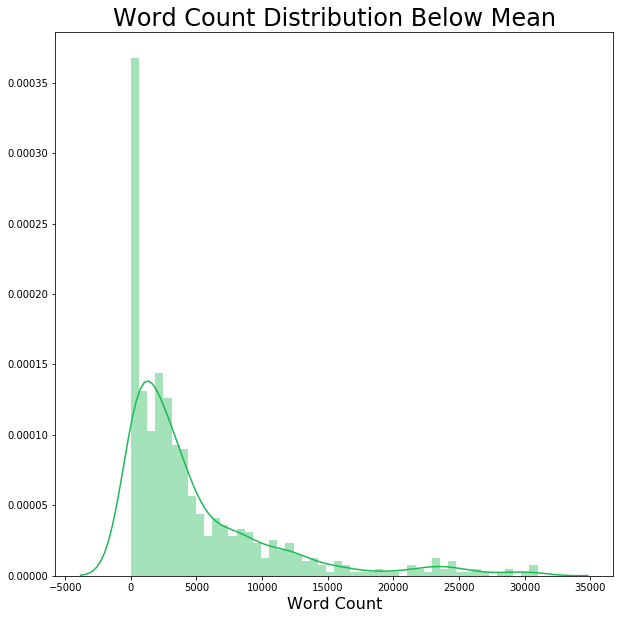

In [186]:
fig, ax = plt.subplots(figsize=(10,10))

sns.distplot(lyrics_df['word_cnt'][lyrics_df['word_cnt'] < word_cnt_mean],bins=50, color=spotify_green)
# ax.legend([str(less_than_avg) + ' songs'],fontsize='x-large')
ax.set_title('Word Count Distribution Below Mean', size=24)
ax.set_xlabel('Word Count', size=16);

In [166]:
str(less_than_avg)

'628'

In [188]:
less_than_avg = lyrics_df['word_cnt'][lyrics_df['word_cnt'] < word_cnt_mean].shape[0]
more_than_avg = lyrics_df['word_cnt'][lyrics_df['word_cnt'] > word_cnt_mean].shape[0]
less_than_avg, more_than_avg

(628, 114)

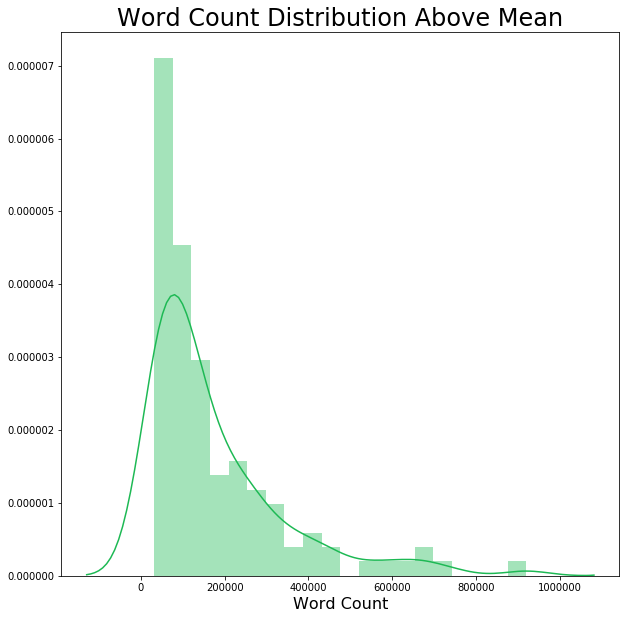

In [187]:
fig, ax = plt.subplots(figsize=(10,10))

sns.distplot(lyrics_df['word_cnt'][lyrics_df['word_cnt'] > word_cnt_mean],bins=20, color=spotify_green)
# ax.legend([str(more_than_avg) + ' songs'],fontsize='x-large')
ax.set_title('Word Count Distribution Above Mean', size=24)
ax.set_xlabel('Word Count', size=16);

In [141]:
album_lyrics[album_lyrics.word_cnt >= 20000]

,album_id,album_release,lyrics,word_cnt
8,5CfVDwhGVceENVF42EZkej,Rauchzeichen by Dramadigs,"Yeeeaah, yo, YO! This is motherfucking Louis ...",336360
13,06jz1EAw6DYQ2kRYy4A3Ph,Refuge by Samuel Kim,A long shot view of the cul de sac is seen. It...,76605
14,59PSddujJQucvH3gV7JWjM,Valentine Court Recaught by Rich Batsford,Theories are dangerous things. All the same we...,56592
15,1sL45MfpK198MamWpjo0zQ,Reach the Stars by The Possum Random,"Apology For Raimond Sebond Learning is, in...",75344
16,2hBkxTzzvjpG948uzrXmKW,Reach the Stars by Jordan Kirkland,Theories are dangerous things. All the same we...,35943
...,...,...,...,...
684,3SeBXn9dP4sB58JNB4vUj8,Pikuniku (Original Soundtrack) by Calum Bowen,Narrator: Are you listening? Good. This is n...,566686
705,0ETFjACtuP2ADo6LFhL6HN,Abbey Road (Remastered) by The Beatles,"I HOW wonderful is Death, Death, and his broth...",189740
714,4sLtOBOzn4s3GDUv3c5oJD,A Star Is Born Soundtrack by Lady Gaga,Intro: (radio signal tuning in) Lady Gaga: I w...,321658
719,60xcVwuQJAOyu11xf9mObS,ASCEND by ILLENIUM,"It's unavoidable, it just happens When you g...",30696


In [155]:
album_lyrics[album_lyrics['album_release'].str.contains("Soundtrack")]

,album_id,album_release,lyrics,word_cnt
124,35s58BRTGAEWztPo9WqCIs,Spider-Man: Into the Spider-Verse (Soundtrack ...,"Last updated: 10/6/2018, 5:16PM MST OctoberOct...",28426
139,7ayBZIe1FHkNv0T5xFCX6F,The Greatest Showman (Original Motion Picture ...,Cassettesdc Talk DC Talk Newsboys Going Publi...,105338
245,4F0LJueCDliCH7Bg4PPVil,The Hours (Music from the Motion Picture Sound...,3a ARTHUR. Page 3. AMONG the various charact...,427598
261,7JCNm5gXgKMKWrNtnYezXu,Ferdinand (Original Motion Picture Soundtrack)...,"I pray you'll be our eyes, and watch us wher...",8502
296,17UaoAh0UsPryIa6Em6zRL,Phineas and Ferb The Movie: Candace Against th...,2/1 Argonavis Passing the Igneous Maw 6/6 ...,263423
662,5ZAaYcFudS0BtKhWJqeMCH,Horizon Zero Dawn (Original Soundtrack) by Var...,Generally speaking a man should not publicly t...,617573
684,3SeBXn9dP4sB58JNB4vUj8,Pikuniku (Original Soundtrack) by Calum Bowen,Narrator: Are you listening? Good. This is n...,566686
714,4sLtOBOzn4s3GDUv3c5oJD,A Star Is Born Soundtrack by Lady Gaga,Intro: (radio signal tuning in) Lady Gaga: I w...,321658


In [156]:
word_cnt_mean = album_lyrics['word_cnt'].mean()

In [175]:
word_cnt_mean

31263.04177897574

In [152]:
album_lyrics['word_cnt'].std()

90682.95390285598

In [153]:
album_lyrics['word_cnt'].var()

8223398128.5475025

In [185]:
album_lyrics['word_cnt'].sum()

23197177